In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
from glob import glob
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
tf.keras.utils.set_random_seed(0)

In [3]:
imgs_path = glob('/content/drive/MyDrive/Colab Notebooks/Apple/Apple A/*')

In [4]:
print(len(imgs_path))

692


In [5]:
imgs_path

['/content/drive/MyDrive/Colab Notebooks/Apple/Apple A/Apple 101.png',
 '/content/drive/MyDrive/Colab Notebooks/Apple/Apple A/Apple 100.png',
 '/content/drive/MyDrive/Colab Notebooks/Apple/Apple A/Apple 111.png',
 '/content/drive/MyDrive/Colab Notebooks/Apple/Apple A/Apple 108.png',
 '/content/drive/MyDrive/Colab Notebooks/Apple/Apple A/Apple 104.png',
 '/content/drive/MyDrive/Colab Notebooks/Apple/Apple A/Apple 1.png',
 '/content/drive/MyDrive/Colab Notebooks/Apple/Apple A/Apple 102.png',
 '/content/drive/MyDrive/Colab Notebooks/Apple/Apple A/Apple 103.png',
 '/content/drive/MyDrive/Colab Notebooks/Apple/Apple A/Apple 110.png',
 '/content/drive/MyDrive/Colab Notebooks/Apple/Apple A/Apple 106.png',
 '/content/drive/MyDrive/Colab Notebooks/Apple/Apple A/Apple 10.png',
 '/content/drive/MyDrive/Colab Notebooks/Apple/Apple A/Apple 105.png',
 '/content/drive/MyDrive/Colab Notebooks/Apple/Apple A/Apple 107.png',
 '/content/drive/MyDrive/Colab Notebooks/Apple/Apple A/Apple 109.png',
 '/conten

In [6]:
imgs_np = []

In [7]:
# for im_path in imgs_path:
#     tmp_img = cv2.imread(im_path)
    
#     tmp_img = cv2.cvtColor(tmp_img, cv2.COLOR_BGR2RGB)
#     imgs_np.append(tmp_img)

In [8]:
# imgs_np[0].shape

In [9]:
# fig, ax = plt.subplots(nrows=10, figsize=(10,20))

# for a, im in zip(ax, imgs_np[:10]):
#     a.imshow(im)
    
# fig.tight_layout()
# plt.show()

In [10]:
lista = ['Apple A', 'Apple B', 'Apple C','Apple D','Apple E','Apple F']
apples = []


In [11]:
#wczytanie ścieżek zdjęć i labeli z google drive
for folder in lista:
  tmp = []
  tmp = glob(f'/content/drive/MyDrive/Colab Notebooks/Apple/{folder}/*')
  f_name = len(tmp)*[folder]
  apples += list(zip(tmp, f_name))


In [12]:
apples[5684]

('/content/drive/MyDrive/Colab Notebooks/Apple/Apple F/Apple F _0_7094.png',
 'Apple F')

In [13]:
len(apples)

6161

In [14]:
# imgs_apples_np = []

In [15]:
# imgs_apples_np = []
# for app in apples:
#   tmp_img = cv2.imread(app[0])
  
#   tmp_img = cv2.cvtColor(tmp_img, cv2.COLOR_BGR2RGB)
#   imgs_apples_np.append(tmp_img)

In [16]:
# imgs_apples_np[0].shape

In [17]:
# len(imgs_apples_np)

In [18]:
# imgs_apples_np[1]

In [19]:
# plt.imshow(imgs_apples_np[1])

In [20]:
# fig, ax = plt.subplots(nrows=10, figsize=(10,20))

# for a, im in zip(ax, imgs_apples_np[70:84]):
#     a.imshow(im)
    
# fig.tight_layout()
# plt.show()

In [47]:
# stworzenie df
df = pd.DataFrame(apples, columns=['path', 'fruit'])
df

,path,fruit
0,/content/drive/MyDrive/Colab Notebooks/Apple/A...,Apple A
1,/content/drive/MyDrive/Colab Notebooks/Apple/A...,Apple A
2,/content/drive/MyDrive/Colab Notebooks/Apple/A...,Apple A
3,/content/drive/MyDrive/Colab Notebooks/Apple/A...,Apple A
4,/content/drive/MyDrive/Colab Notebooks/Apple/A...,Apple A
...,...,...
6156,/content/drive/MyDrive/Colab Notebooks/Apple/A...,Apple F
6157,/content/drive/MyDrive/Colab Notebooks/Apple/A...,Apple F
6158,/content/drive/MyDrive/Colab Notebooks/Apple/A...,Apple F
6159,/content/drive/MyDrive/Colab Notebooks/Apple/A...,Apple F


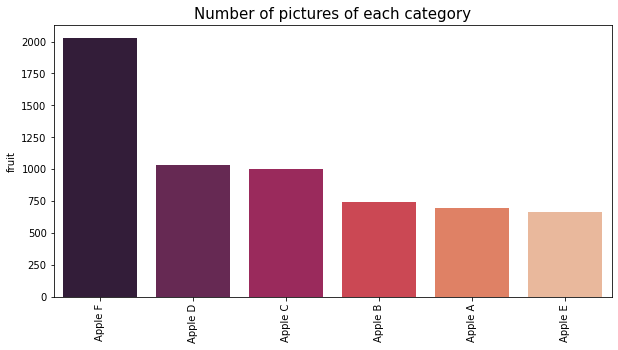

In [22]:
# wykres liczebności kategorii
vc = df["fruit"].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x = vc.index, y = vc, palette = "rocket")
plt.title("Number of pictures of each category", fontsize = 15)
plt.xticks(rotation=90)
plt.show()

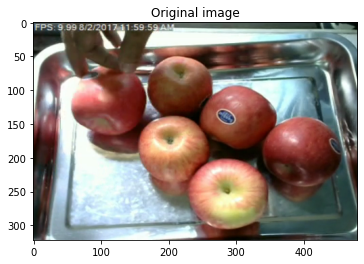

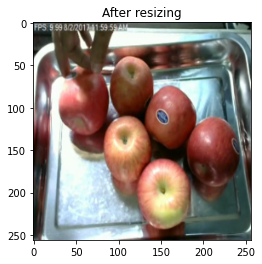

In [23]:
#zmiana rozdzielczosci pojedynczego zdjecia i wyswietlenie
img = plt.imread(df.path[0])
plt.imshow(img)
plt.title("Original image")
plt.show()

plt.imshow(cv2.resize(img, (256,256)))
plt.title("After resizing")
plt.show()

In [48]:
# dodanie do df kolumny label ze zmapowanymi kategoriami
fruit_names = sorted(df.fruit.unique())
mapper_fruit_names = dict(zip(fruit_names, [t for t in range(len(fruit_names))]))
df["label"] = df["fruit"].map(mapper_fruit_names)
print(mapper_fruit_names)

{'Apple A': 0, 'Apple B': 1, 'Apple C': 2, 'Apple D': 3, 'Apple E': 4, 'Apple F': 5}


In [25]:
def load_img(df, size):
# Load the images using their contained in the dataframe df
# Return a list of images and a list with the labels of the images
    img_paths = df["path"].values
    img_labels = df["label"].values
    X = []
    y = []
    
    for i,path in enumerate(img_paths):
        img =  plt.imread(path)
        img = cv2.resize(img, (size,size))
        label = img_labels[i]
        X.append(img)
        y.append(label)
    return np.array(X),np.array(y)

In [49]:
# przemieszanie danych w dfie
from sklearn.utils import shuffle
df = shuffle(df, random_state = 0)
df = df.reset_index(drop=True)

In [50]:
df[:600]

,path,fruit,label
0,/content/drive/MyDrive/Colab Notebooks/Apple/A...,Apple D,3
1,/content/drive/MyDrive/Colab Notebooks/Apple/A...,Apple D,3
2,/content/drive/MyDrive/Colab Notebooks/Apple/A...,Apple D,3
3,/content/drive/MyDrive/Colab Notebooks/Apple/A...,Apple F,5
4,/content/drive/MyDrive/Colab Notebooks/Apple/A...,Apple A,0
...,...,...,...
595,/content/drive/MyDrive/Colab Notebooks/Apple/A...,Apple F,5
596,/content/drive/MyDrive/Colab Notebooks/Apple/A...,Apple D,3
597,/content/drive/MyDrive/Colab Notebooks/Apple/A...,Apple D,3
598,/content/drive/MyDrive/Colab Notebooks/Apple/A...,Apple A,0


In [28]:
# wczytanie ograniczonej liczby zdjec i ich labeli
x, y = load_img(df[:600], 256)

In [51]:
# wczytanie ograniczonej liczby zdjec i ich labeli
x_1, y_1 = load_img(df[600:1600], 256)

In [37]:
np.unique(y, return_counts=True)

(array([0, 1, 2, 3, 4, 5]), array([ 70,  64, 104, 106,  48, 208]))

In [58]:
np.unique(y_1, return_counts=True)

(array([0, 1, 2, 3, 4, 5]), array([111, 115, 166, 174, 111, 323]))

In [29]:
#x, y = load_img(df, 256)

In [30]:
x.shape, y.shape

((600, 256, 256, 3), (600,))

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [52]:
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_1, y_1, test_size=0.2, random_state=0)

In [53]:
x_train_1.shape, x_test_1.shape, y_train_1.shape, y_test_1.shape

((800, 256, 256, 3), (200, 256, 256, 3), (800,), (200,))

In [32]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((480, 256, 256, 3), (120, 256, 256, 3), (480,), (120,))

In [38]:
# def build_model(x_train, y_train, x_test, y_test, conv2D_num:int, filters_num:list, classNum=6, batch_size=20, epochs=40):
#     if conv2D_num != len(filters_num):
#         print('liczba warstw ukrytych nie pokrywa się z liczbą neuronów')
#     else:
#         shape_img = (256,256,3)
#         model = keras.Sequential()

#         model.add(keras.layers.InputLayer(input_shape=shape_img))

#         for i in range(1, conv2D_num+1):
#             model.add(keras.layers.Conv2D(filters_num[i-1], kernel_size=(3,3), activation='relu'))
#             model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

#         model.add(keras.layers.Flatten())
#         model.add(keras.layers.Dense(30, activation='relu'))
#         model.add(keras.layers.Dense(classNum, name='wyjscie'))
#         model.add(keras.layers.Softmax())
        
#         model.summary()
        
#         opt = keras.optimizers.Adam()
#         model.compile(optimizer=opt, loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

#         results = model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs, verbose=1, 
#                             validation_data=(x_test, y_test), shuffle=True)
        
#         df = pd.DataFrame.from_dict(results.history)
#         df
#         df.plot(y = ['accuracy', 'val_accuracy'])
#         df.plot(y = ['loss', 'val_loss'])


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 4)       112       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 127, 127, 4)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 4)       148       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 62, 62, 4)        0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 15376)             0         
                                                                 
 dense_3 (Dense)             (None, 30)               

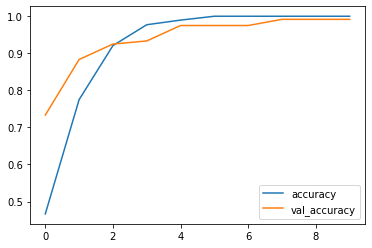

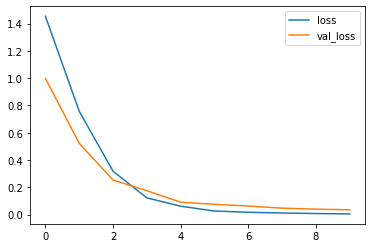

In [41]:
# build_model(x_train, y_train, x_test, y_test, 2, [4, 4], epochs=10)

In [54]:
# funkcja budująca model z otrzymanych parametrow
def build_model(conv2D_num:int, filters_num:list, classNum=6):
    if conv2D_num != len(filters_num):
        print('liczba warstw ukrytych nie pokrywa się z liczbą neuronów')
    else:
        shape_img = (256,256,3)
        model = keras.Sequential()

        model.add(keras.layers.InputLayer(input_shape=shape_img))

        for i in range(1, conv2D_num+1):
            model.add(keras.layers.Conv2D(filters_num[i-1], kernel_size=(3,3), activation='relu'))
            model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

        model.add(keras.layers.Flatten())
        model.add(keras.layers.Dense(30, activation='relu'))
        model.add(keras.layers.Dense(classNum, name='wyjscie'))
        model.add(keras.layers.Softmax())
        
        model.summary()
        
        opt = keras.optimizers.Adam()
        model.compile(optimizer=opt, loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

        return model


In [55]:
model = build_model(2, [4, 4])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 254, 254, 4)       112       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 127, 127, 4)      0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 125, 125, 4)       148       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 62, 62, 4)        0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 15376)             0         
                                                                 
 dense_5 (Dense)             (None, 30)               

Epoch 1/10
24/24 [==============================] - 43s 528ms/step - loss: 1.5916 - accuracy: 0.3688 - val_loss: 1.3017 - val_accuracy: 0.5667
Epoch 2/10
24/24 [==============================] - 13s 523ms/step - loss: 1.0344 - accuracy: 0.6375 - val_loss: 0.7444 - val_accuracy: 0.8833
Epoch 3/10
24/24 [==============================] - 13s 526ms/step - loss: 0.5060 - accuracy: 0.8938 - val_loss: 0.3409 - val_accuracy: 0.9333
Epoch 4/10
24/24 [==============================] - 13s 529ms/step - loss: 0.2798 - accuracy: 0.9396 - val_loss: 0.2550 - val_accuracy: 0.9750
Epoch 5/10
24/24 [==============================] - 13s 530ms/step - loss: 0.1508 - accuracy: 0.9729 - val_loss: 0.1506 - val_accuracy: 0.9833
Epoch 6/10
24/24 [==============================] - 14s 573ms/step - loss: 0.0995 - accuracy: 0.9792 - val_loss: 0.1252 - val_accuracy: 0.9833
Epoch 7/10
24/24 [==============================] - 13s 527ms/step - loss: 0.0607 - accuracy: 1.0000 - val_loss: 0.0969 - val_accuracy: 0.9917

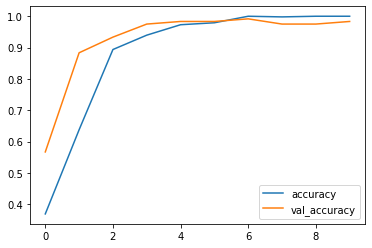

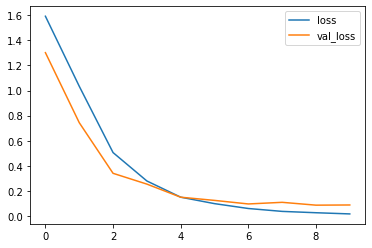

In [56]:
# trening modelu na pierwsze probce danych 480 zdjec
results = model.fit(x=x_train, y=y_train, batch_size=20, epochs=10, verbose=1,validation_data=(x_test, y_test), shuffle=True)

df_res = pd.DataFrame.from_dict(results.history)
df_res
df_res.plot(y = ['accuracy', 'val_accuracy'])
df_res.plot(y = ['loss', 'val_loss'])

Epoch 1/10
40/40 [==============================] - 21s 528ms/step - loss: 0.1166 - accuracy: 0.9675 - val_loss: 0.1702 - val_accuracy: 0.9600
Epoch 2/10
40/40 [==============================] - 21s 525ms/step - loss: 0.0659 - accuracy: 0.9862 - val_loss: 0.0664 - val_accuracy: 0.9900
Epoch 3/10
40/40 [==============================] - 21s 526ms/step - loss: 0.0173 - accuracy: 0.9987 - val_loss: 0.0687 - val_accuracy: 0.9850
Epoch 4/10
40/40 [==============================] - 21s 527ms/step - loss: 0.0119 - accuracy: 1.0000 - val_loss: 0.0584 - val_accuracy: 0.9900
Epoch 5/10
40/40 [==============================] - 21s 527ms/step - loss: 0.0075 - accuracy: 1.0000 - val_loss: 0.0548 - val_accuracy: 0.9900
Epoch 6/10
40/40 [==============================] - 21s 527ms/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.0557 - val_accuracy: 0.9900
Epoch 7/10
40/40 [==============================] - 21s 527ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.0613 - val_accuracy: 0.9850

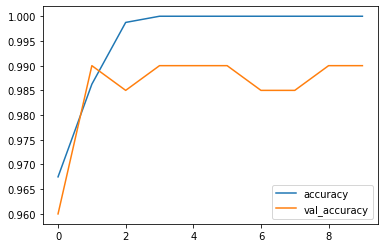

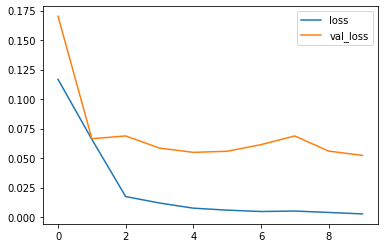

In [57]:
# dotrenowanie modelu wykorzystujac kolejna porcje danych (800 zdjec)
results = model.fit(x=x_train_1, y=y_train_1, batch_size=20, epochs=10, verbose=1,validation_data=(x_test_1, y_test_1), shuffle=True)

df_res = pd.DataFrame.from_dict(results.history)
df_res
df_res.plot(y = ['accuracy', 'val_accuracy'])
df_res.plot(y = ['loss', 'val_loss'])